In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('combined-training.csv')
# Get basic info about the dataset
df.info()
# Get summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIS     33645 non-null  float64
 1   x1      33645 non-null  float64
 2   x2      33645 non-null  float64
 3   x3      33645 non-null  float64
 4   x4      33645 non-null  float64
 5   x5      33645 non-null  float64
 6   x6      33645 non-null  float64
 7   x7      33645 non-null  float64
dtypes: float64(8)
memory usage: 2.1 MB


,BIS,x1,x2,x3,x4,x5,x6,x7
count,33645.000000,33645.000000,33645.000000,33645.000000,33645.000000,33645.000000,33645.000000,33645.000000
mean,41.694582,0.660667,1.789144,1.785165,0.870912,1.013450,0.693157,0.388178
std,16.336583,0.047692,0.008522,0.003273,0.822348,0.023614,0.292224,0.008800
min,5.300000,0.480816,1.542146,1.779489,0.139335,0.880547,0.044623,0.374989
25%,30.800000,0.625311,1.789973,1.782343,0.351358,1.003973,0.481118,0.383036
50%,40.100000,0.661472,1.790933,1.785161,0.510550,1.015341,0.662049,0.385354
75%,45.700000,0.698184,1.791328,1.787998,1.186007,1.024747,0.923880,0.389416
max,97.700000,0.835586,1.791751,1.790815,6.805957,1.110921,1.954334,0.453838


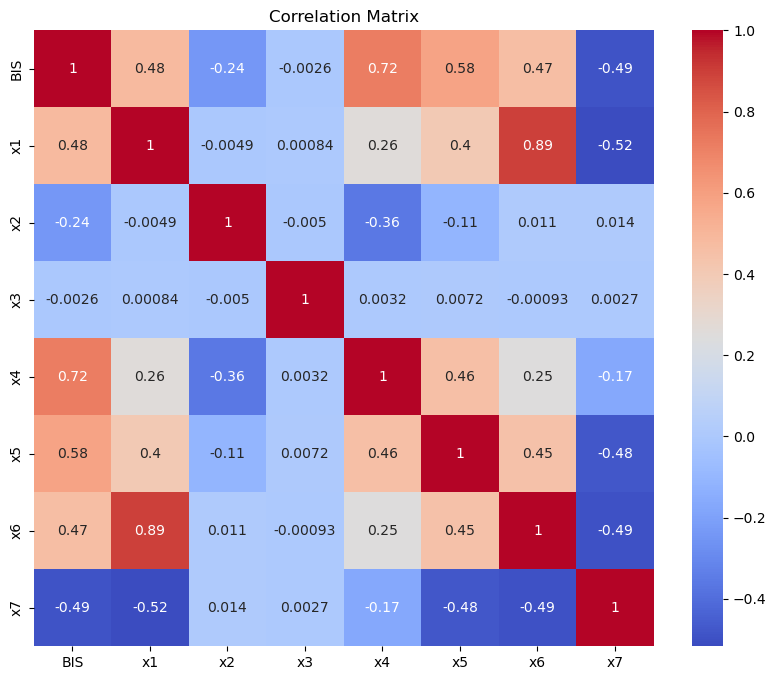

In [2]:
# Get the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

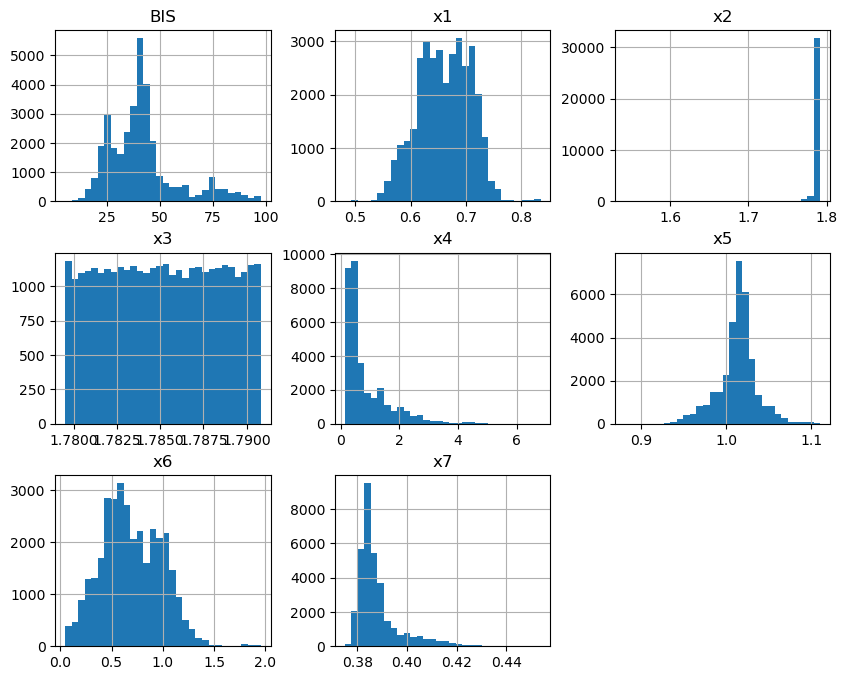

In [3]:
# Plot histograms for all numerical features
df.hist(bins=30, figsize=(10,8))
plt.show()


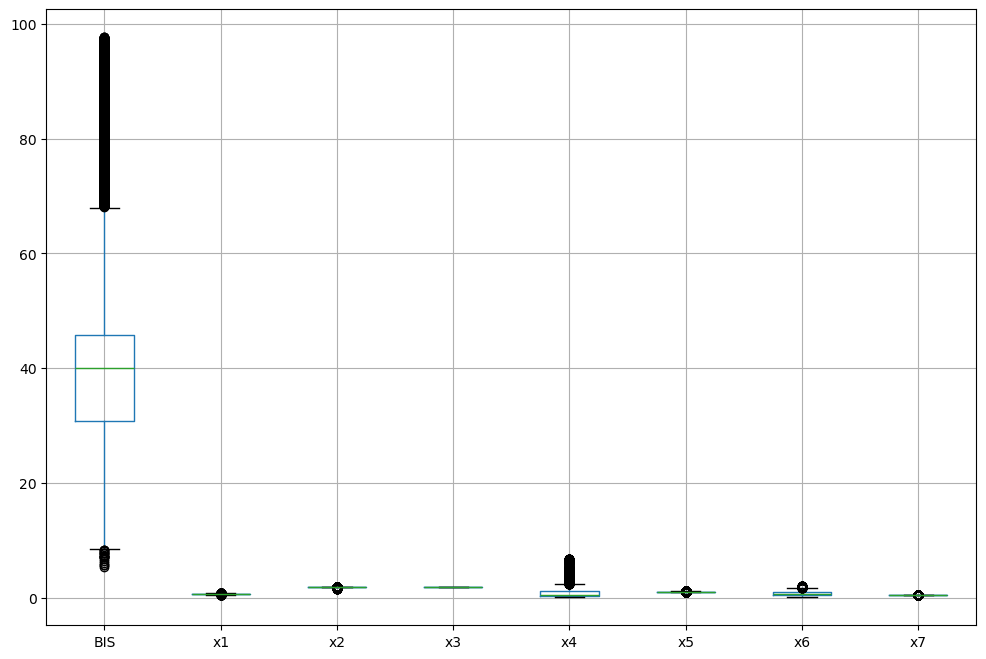

In [4]:
# Box plot for outlier detection
df.boxplot(figsize=(12, 8))
plt.show()

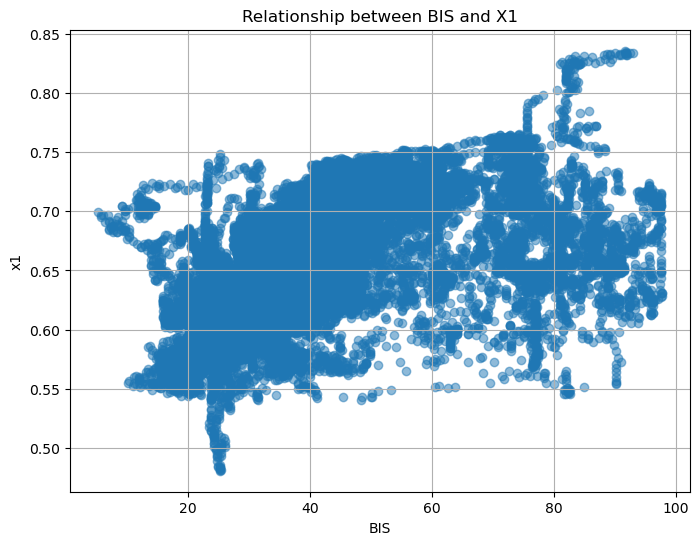

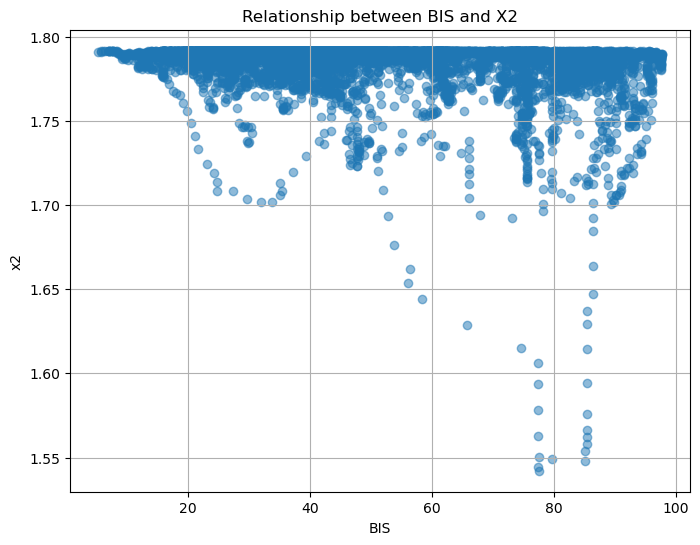

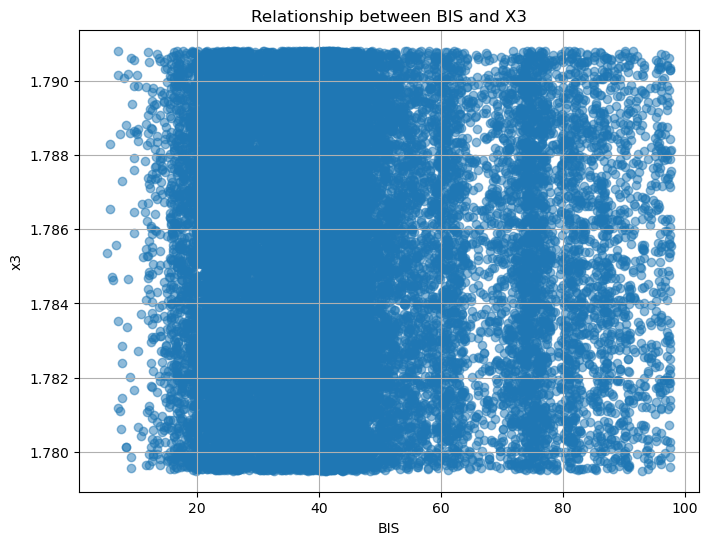

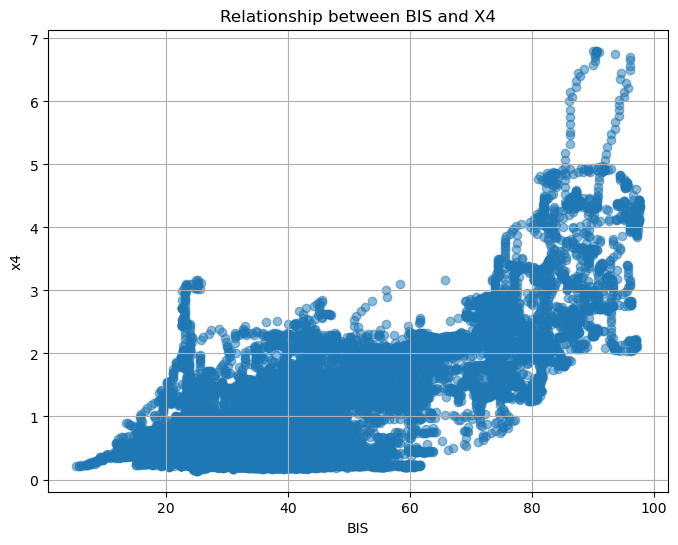

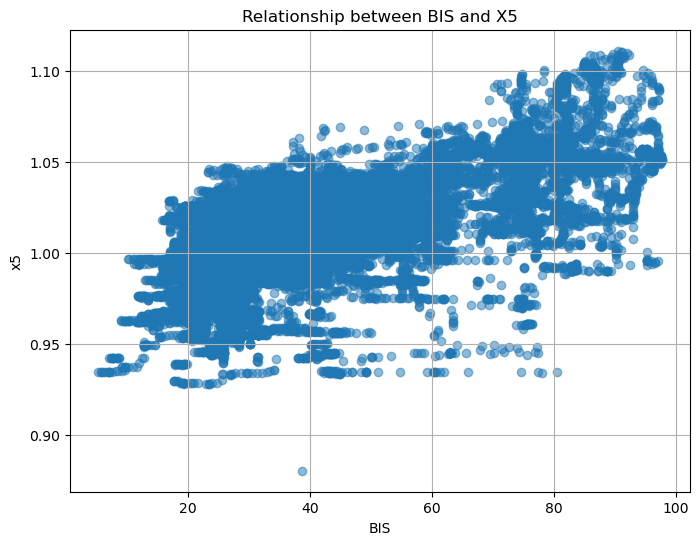

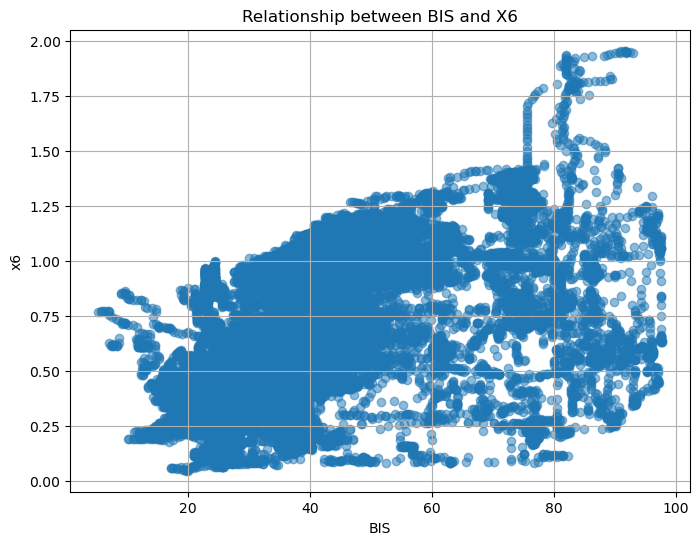

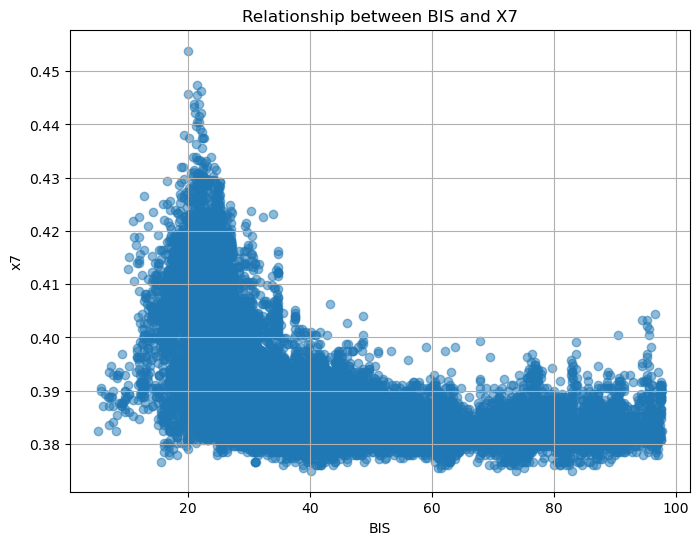

In [5]:
# Scatter plot using Matplotlib
for x in range(7):
    plt.figure(figsize=(8, 6))
    y = 'x'+str(x+1)
    plt.scatter(df['BIS'], df[y], alpha=0.5)
    plt.title('Relationship between BIS and X' + str(x+1))
    plt.xlabel('BIS')
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


In [8]:
from scipy import stats

# Calculate the Z-scores of each feature
z_scores = stats.zscore(df[['BIS', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']])

# Filter out rows where any feature's z-score is greater than 3 (or less than -3)
outliers_zscore = df[(z_scores > 3).any(axis=1)]

# Print or visualize the outliers
print(outliers_zscore)


        BIS        x1        x2        x3        x4        x5        x6  \
393    82.5  0.728250  1.779656  1.789708  3.340657  1.072927  1.301313   
394    82.5  0.727427  1.779204  1.788568  3.360817  1.073793  1.311521   
395    82.8  0.732047  1.781406  1.780193  3.385080  1.073996  1.320122   
396    84.1  0.735053  1.784088  1.786623  3.401940  1.075373  1.330516   
397    84.5  0.735182  1.783693  1.781568  3.417146  1.076727  1.341612   
...     ...       ...       ...       ...       ...       ...       ...   
33630  80.4  0.649007  1.790194  1.782570  3.206387  1.086243  0.305310   
33631  80.4  0.649204  1.790037  1.783994  3.184402  1.085302  0.295152   
33632  80.4  0.647470  1.790003  1.782764  3.167595  1.084827  0.290980   
33633  80.4  0.644831  1.789458  1.783550  3.167037  1.084954  0.241639   
33634  80.4  0.641679  1.789665  1.785462  3.174448  1.086384  0.241826   

             x7  
393    0.387070  
394    0.383631  
395    0.379578  
396    0.384794  
397    0.

In [12]:
# Calculate IQR for each feature
Q1 = df[['BIS', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.25)
Q3 = df[['BIS', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print or visualize the outliers
#print(outliers_iqr)

# Remove rows with outliers using IQR method
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the new dataset
print(df_no_outliers.shape)


(23345, 8)


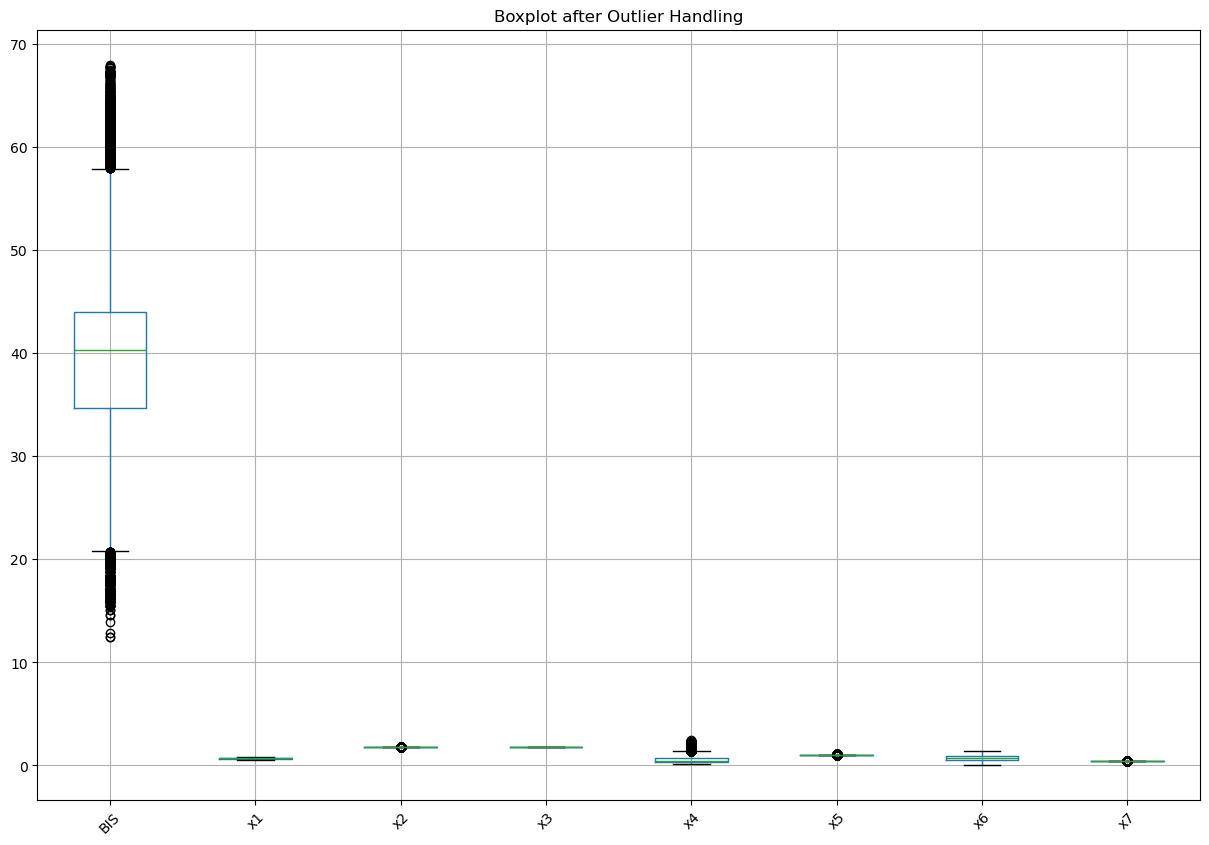

In [14]:
# Re-plot box plot to verify the outlier handling process
plt.figure(figsize=(15, 10))
df_no_outliers.boxplot()
plt.title('Boxplot after Outlier Handling')
plt.xticks(rotation=45)
plt.show()


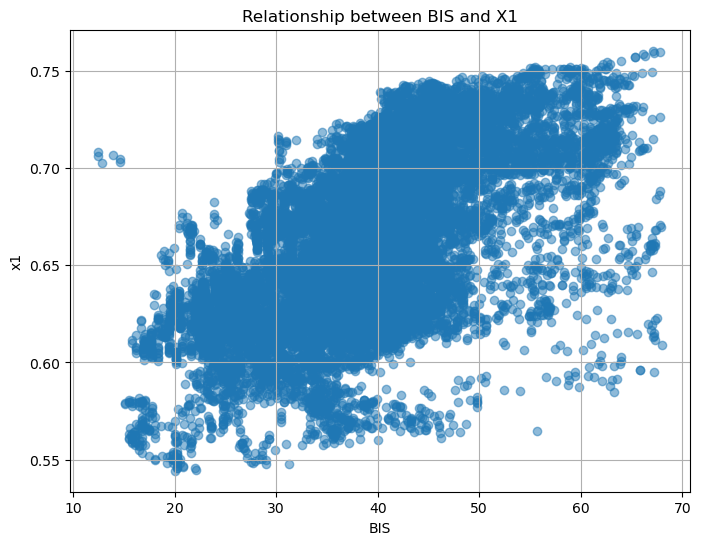

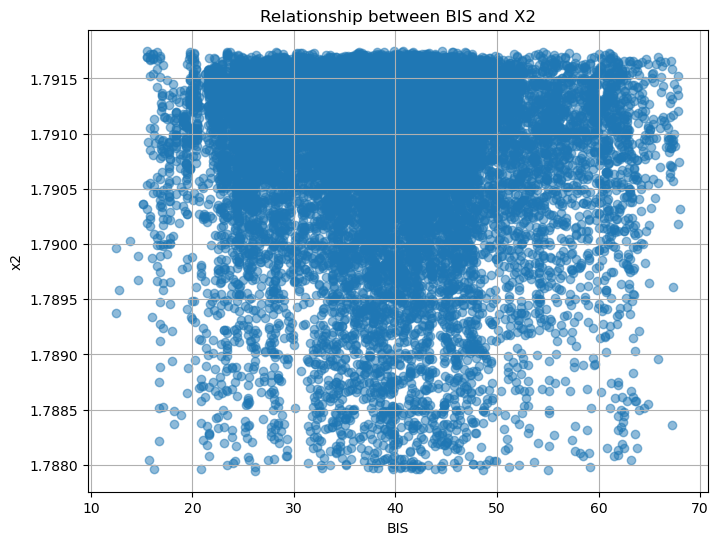

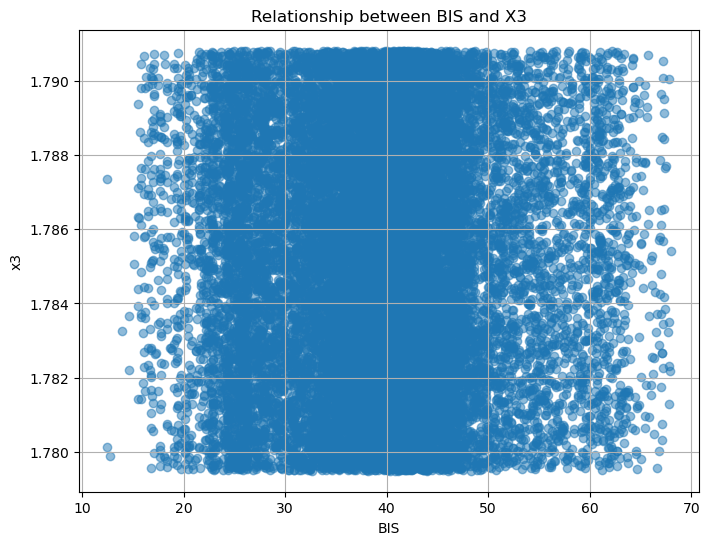

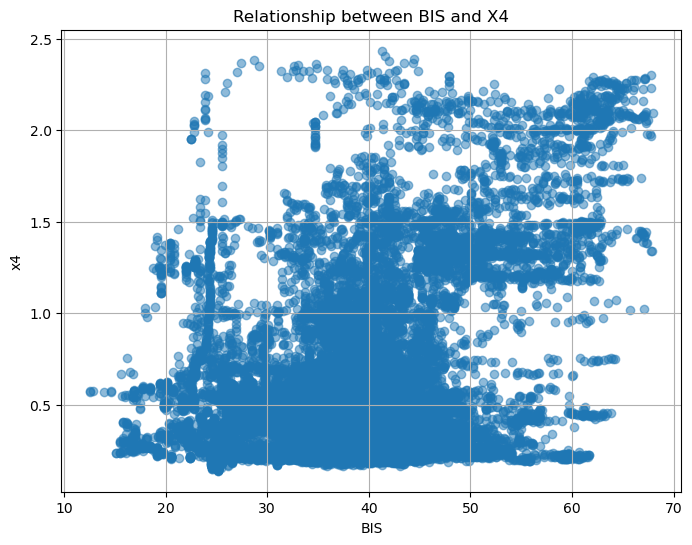

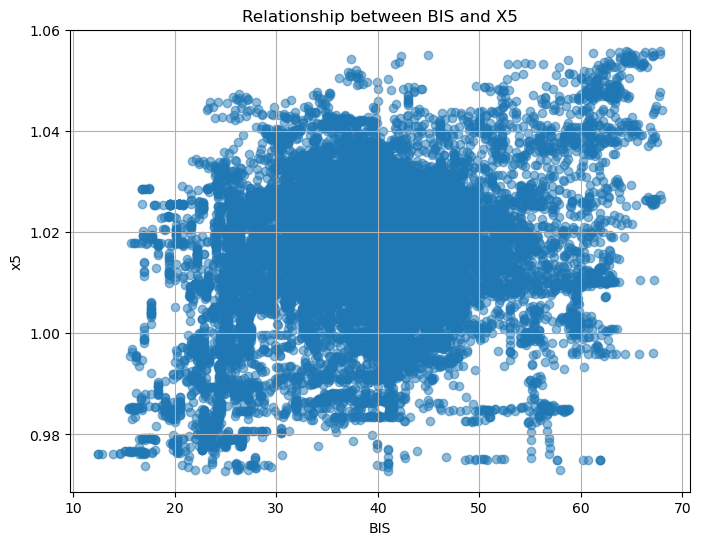

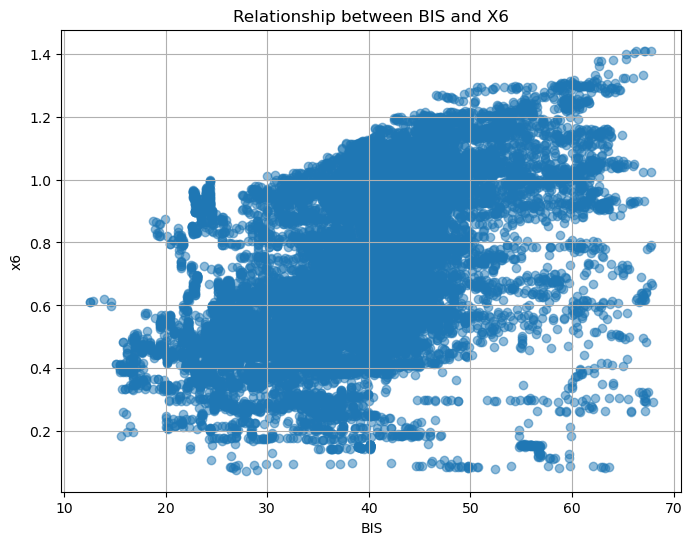

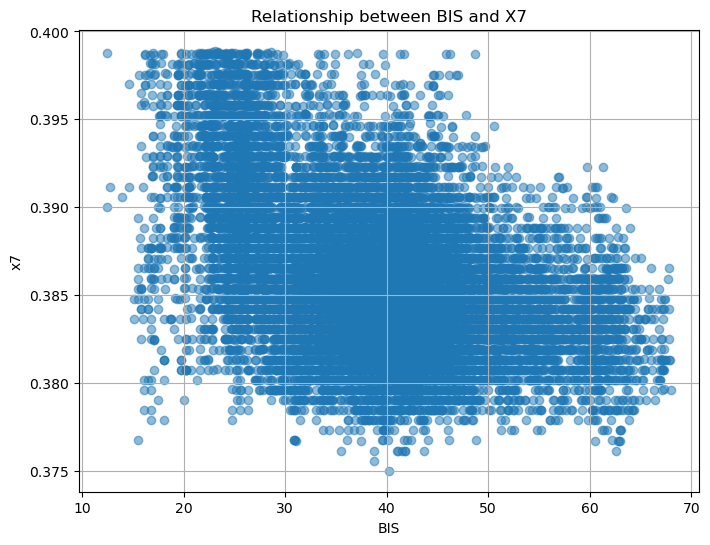

In [15]:
# Scatter plot using Matplotlib
for x in range(7):
    plt.figure(figsize=(8, 6))
    y = 'x'+str(x+1)
    plt.scatter(df_no_outliers['BIS'], df_no_outliers[y], alpha=0.5)
    plt.title('Relationship between BIS and X' + str(x+1))
    plt.xlabel('BIS')
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


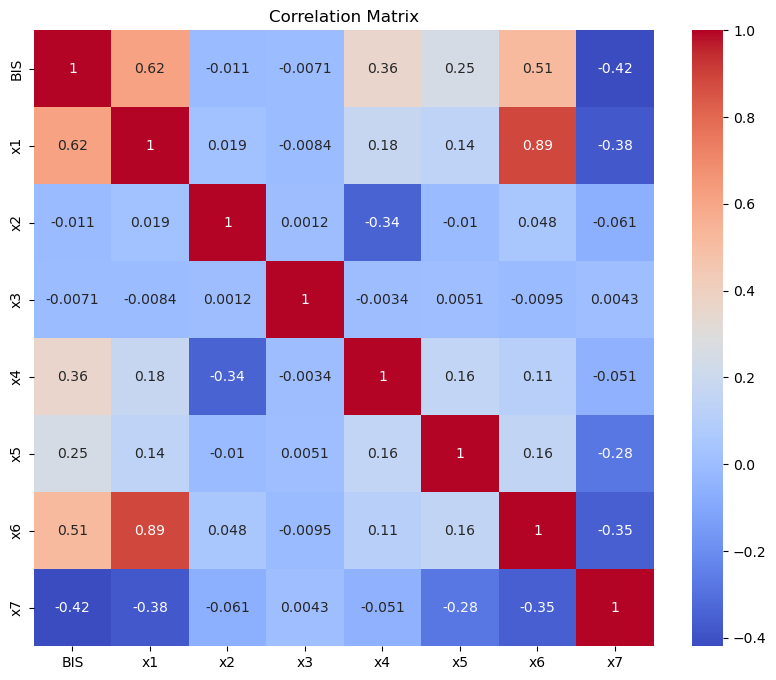

In [17]:

corr_matrix = df_no_outliers.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Calculate Spearman's correlation matrix
spearman_corr = df.corr(method='spearman')
print(spearman_corr)

          BIS        x1        x2        x3        x4        x5        x6  \
BIS  1.000000  0.609224 -0.043035 -0.005914  0.392022  0.473367  0.565049   
x1   0.609224  1.000000  0.098030 -0.000395  0.186963  0.330008  0.896770   
x2  -0.043035  0.098030  1.000000 -0.003290 -0.423868  0.004372  0.153307   
x3  -0.005914 -0.000395 -0.003290  1.000000 -0.000267  0.007228 -0.002281   
x4   0.392022  0.186963 -0.423868 -0.000267  1.000000  0.274799  0.120467   
x5   0.473367  0.330008  0.004372  0.007228  0.274799  1.000000  0.384596   
x6   0.565049  0.896770  0.153307 -0.002281  0.120467  0.384596  1.000000   
x7  -0.561041 -0.483604 -0.129737  0.005575 -0.132651 -0.461293 -0.488385   

           x7  
BIS -0.561041  
x1  -0.483604  
x2  -0.129737  
x3   0.005575  
x4  -0.132651  
x5  -0.461293  
x6  -0.488385  
x7   1.000000  


In [19]:

# Kendall's Tau correlation
kendall_corr = df.corr(method='kendall')
print(kendall_corr)
import dcor

# Distance correlation between BIS and X1
dist_corr_x1 = dcor.distance_correlation(df['BIS'], df['x1'])
print(f"Distance correlation between BIS and X1: {dist_corr_x1}")


          BIS        x1        x2        x3        x4        x5        x6  \
BIS  1.000000  0.444603 -0.026593 -0.003956  0.269161  0.329860  0.413543   
x1   0.444603  1.000000  0.065623 -0.000253  0.124258  0.224338  0.744610   
x2  -0.026593  0.065623  1.000000 -0.002204 -0.287832  0.004154  0.102390   
x3  -0.003956 -0.000253 -0.002204  1.000000 -0.000156  0.004835 -0.001513   
x4   0.269161  0.124258 -0.287832 -0.000156  1.000000  0.186982  0.078507   
x5   0.329860  0.224338  0.004154  0.004835  0.186982  1.000000  0.262963   
x6   0.413543  0.744610  0.102390 -0.001513  0.078507  0.262963  1.000000   
x7  -0.394790 -0.335483 -0.086960  0.003706 -0.088857 -0.319061 -0.339699   

           x7  
BIS -0.394790  
x1  -0.335483  
x2  -0.086960  
x3   0.003706  
x4  -0.088857  
x5  -0.319061  
x6  -0.339699  
x7   1.000000  


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Distance correlation between BIS and X1: 0.5415202919383286


In [20]:
# Correlation with BIS (target variable)
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation with BIS:
BIS    1.000000
x1     0.483174
x2    -0.239458
x3    -0.002611
x4     0.717483
x5     0.582369
x6     0.465200
x7    -0.490381
Name: BIS, dtype: float64
Spearman Correlation with BIS:
BIS    1.000000
x1     0.609224
x2    -0.043035
x3    -0.005914
x4     0.392022
x5     0.473367
x6     0.565049
x7    -0.561041
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


In [20]:
# Correlation with BIS (target variable)
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation with BIS:
BIS    1.000000
x1     0.483174
x2    -0.239458
x3    -0.002611
x4     0.717483
x5     0.582369
x6     0.465200
x7    -0.490381
Name: BIS, dtype: float64
Spearman Correlation with BIS:
BIS    1.000000
x1     0.609224
x2    -0.043035
x3    -0.005914
x4     0.392022
x5     0.473367
x6     0.565049
x7    -0.561041
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


In [20]:
# Correlation with BIS (target variable)
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation with BIS:
BIS    1.000000
x1     0.483174
x2    -0.239458
x3    -0.002611
x4     0.717483
x5     0.582369
x6     0.465200
x7    -0.490381
Name: BIS, dtype: float64
Spearman Correlation with BIS:
BIS    1.000000
x1     0.609224
x2    -0.043035
x3    -0.005914
x4     0.392022
x5     0.473367
x6     0.565049
x7    -0.561041
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


In [21]:
# Check multicollinearity by inspecting pairwise correlation between features
feature_corr = df.corr()

# Find pairs of features with a high correlation (>0.8)
multicollinearity_threshold = 0.8
high_corr_pairs = [(f1, f2) for f1 in feature_corr.columns for f2 in feature_corr.columns 
                   if f1 != f2 and abs(feature_corr.loc[f1, f2]) > multicollinearity_threshold]

print("Highly correlated feature pairs (multicollinearity):")
print(high_corr_pairs)

# From the pairs identified, you can choose to remove one of the features to avoid redundancy.


Highly correlated feature pairs (multicollinearity):
[('x1', 'x6'), ('x6', 'x1')]


In [22]:
# Correlation with BIS (target variable)
pearson_corr = df_no_outliers.corr(method='pearson')
spearman_corr = df_no_outliers.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation with BIS:
BIS    1.000000
x1     0.615606
x2    -0.010846
x3    -0.007108
x4     0.362043
x5     0.248235
x6     0.513322
x7    -0.419605
Name: BIS, dtype: float64
Spearman Correlation with BIS:
BIS    1.000000
x1     0.636679
x2    -0.005568
x3    -0.009026
x4     0.187879
x5     0.119313
x6     0.552981
x7    -0.343226
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


In [24]:
from scipy import stats
import numpy as np

# Calculate Z-scores for all features
z_scores = np.abs(stats.zscore(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]))

# Keep only data points where Z-score is below 3 (within 3 standard deviations)
df_no_outliers_zscore = df[(z_scores < 3).all(axis=1)]

# Correlation with BIS (target variable)
pearson_corr = df_no_outliers_zscore.corr(method='pearson')
spearman_corr = df_no_outliers_zscore.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation removed outliers wiht z score with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation removed outliers wiht z score with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation removed outliers wiht z score with BIS:
BIS    1.000000
x1     0.487541
x2    -0.180691
x3    -0.005900
x4     0.635226
x5     0.517847
x6     0.456529
x7    -0.515404
Name: BIS, dtype: float64
Spearman Correlation removed outliers wiht z score with BIS:
BIS    1.000000
x1     0.612300
x2    -0.011090
x3    -0.008741
x4     0.331747
x5     0.407800
x6     0.563014
x7    -0.538914
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


In [28]:
# Calculate the thresholds for trimming the top and bottom 1% of the data
lower_bound = df.quantile(0.01)
upper_bound = df.quantile(0.99)

# Remove data outside the 1st and 99th percentiles
df_trimmed = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Correlation with BIS (target variable)
pearson_corr = df_trimmed.corr(method='pearson')
spearman_corr = df_trimmed.corr(method='spearman')

# Display correlation with the target (BIS)
print("Pearson Correlation removed outliers trimmed with BIS:")
print(pearson_corr['BIS'])

print("Spearman Correlation removed outliers trimmed with BIS:")
print(spearman_corr['BIS'])

# Set a threshold to ignore features with weak correlations
correlation_threshold = 0.1  # You can adjust this value based on your dataset

# Identify features with low correlation with BIS
low_corr_features_pearson = pearson_corr['BIS'][abs(pearson_corr['BIS']) < correlation_threshold].index
low_corr_features_spearman = spearman_corr['BIS'][abs(spearman_corr['BIS']) < correlation_threshold].index

# Combine results from both methods
features_to_ignore = set(low_corr_features_pearson).union(low_corr_features_spearman)
print(f"Features to potentially ignore (based on low correlation with BIS): {features_to_ignore}")


Pearson Correlation removed outliers trimmed with BIS:
BIS    1.000000
x1     0.490571
x2    -0.216477
x3    -0.005914
x4     0.628281
x5     0.505252
x6     0.446486
x7    -0.505387
Name: BIS, dtype: float64
Spearman Correlation removed outliers trimmed with BIS:
BIS    1.000000
x1     0.621716
x2    -0.010365
x3    -0.007847
x4     0.321826
x5     0.395459
x6     0.561238
x7    -0.535945
Name: BIS, dtype: float64
Features to potentially ignore (based on low correlation with BIS): {'x3', 'x2'}


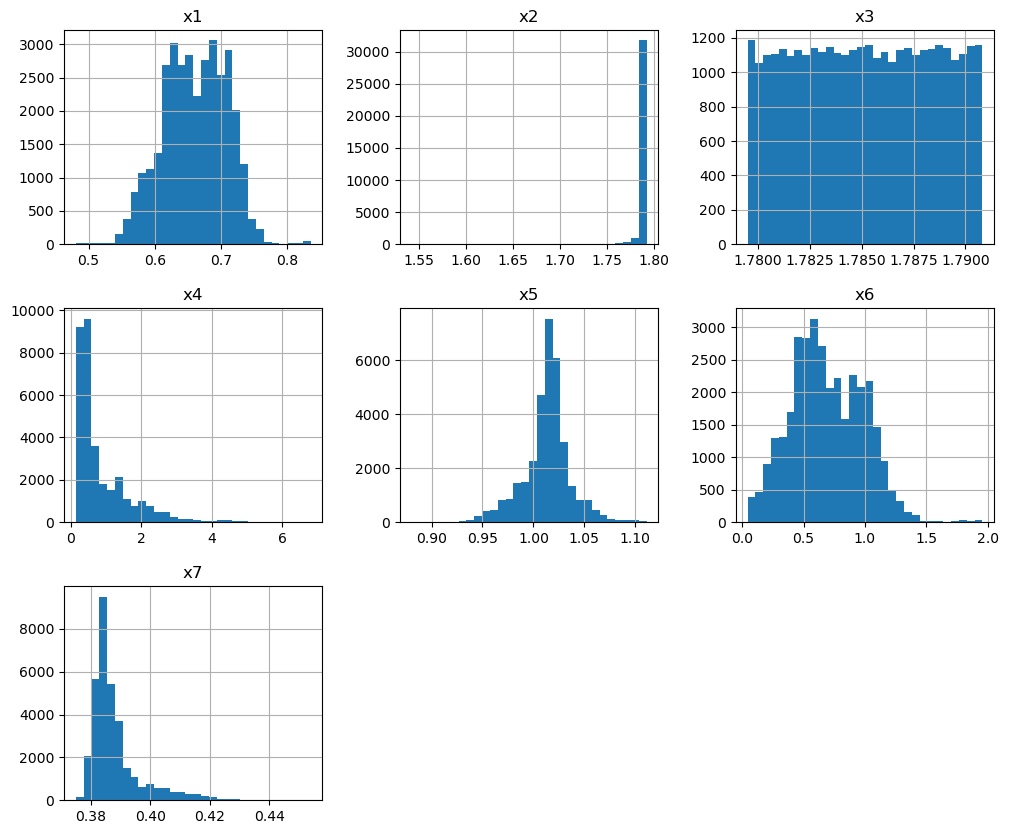

In [29]:
# Plot histograms to visualize the distribution of each feature
df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].hist(bins=30, figsize=(12, 10))
plt.show()


In [30]:
# Check variance for each feature
variances = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].var()
print(variances)


x1    0.002274
x2    0.000073
x3    0.000011
x4    0.676256
x5    0.000558
x6    0.085395
x7    0.000077
dtype: float64


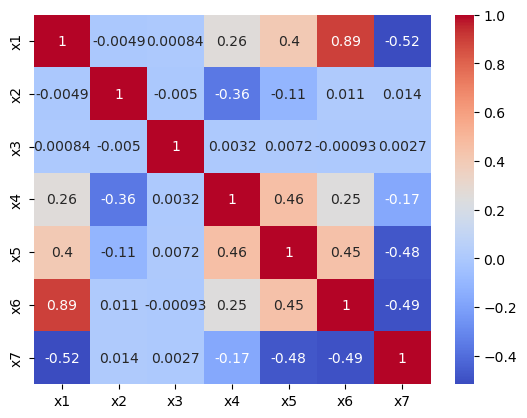

In [31]:
# Compute the correlation matrix between features
feature_corr = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']].corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest to calculate feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
feature_importance = rf.feature_importances_
sns.barplot(x=feature_importance, y=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
plt.title('Feature Importance from Random Forest')
plt.show()


NameError: name 'X_train' is not defined